In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

Данные взяты из варианта 16.
Даны данные изменения цены и числа продаж одного из товаров, представленных в интернет-магазине за 20
дней. Необходимо определить базовые показатели, вычисляемые на данных
price - стоимость -
amount - число продаж
day - временной период (день)
Сами данные записаны в коде ниже в соответствующих столбцах датафрейма

При вычисление характеристик не будут использоваться стандартные методы. (Но нужные методы будут оставлены в комментарии)

In [56]:
df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
                   'price': [1.81, 1.81, 3.78, 3.78, 3.78, 3.78, 3.78, 3.89, 3.93, 3.28, 3.23, 3.21, 3.35, 3.35, 3.37,
                             3.40, 3.25, 3.25, 3.25, 3.29],  # стоимость
                   'amount': [28, 21, 3, 0, 27, 14, 10, 2, 2, 8, 15, 10, 17, 9, 2, 33, 1, 12, 10, 4]})  # число продаж

#df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
#                   'price': [4.10,4.10,4.31,4.33,4.37,4.37,4.37,4.37,4.37,4.38,4.38,4.38,4.39,4.42,4.49,4.49,4.53,4.55,4.57,4.61],  # стоимость
#                   'amount': [7,16,16,17,18,20,25,26,27,29,31,34,41,42,46,47,58,61,75,88]})  # число продаж

Для начала необходимо вычислить характеристики центра группирования
В дальнейшем, эти характеристики будут нанесены на графики зависимости цены от дня и числу продаж от дня.

Начнём с вычисления характеристик центра группирования для стоимости.

Среднее арифметическое(наиболее ожидаемая величина, позволяющее оценить следующее возможное значение) для цены и количества

In [57]:
mean_p = sum(df['price']) / len(df['price'])
#mx = df['price'].mean()
mean_p

3.3284999999999996

In [58]:
mean_a = sum(df['amount']) / len(df['amount'])
#my = df['amount'].mean()
mean_a

11.4

Медиана (среднее по расположению) для цены и количества

In [59]:
# для нахождения медианы сортируем и берём середину. Если значений чётное количество, то берём среднее двух центральных чисел
sorted_p = sorted(df['price'])
median_p = sorted_p[len(sorted_p) // 2] if len(sorted_p) % 2 == 1 else (sorted_p[len(sorted_p) // 2 - 1] + sorted_p[
    len(sorted_p) // 2]) / 2
# median_x = df['price'].median()
median_p

3.35

In [60]:
sorted_a = sorted(df['amount'])
median_a = sorted_a[len(sorted_a) // 2] if len(sorted_a) % 2 == 1 else (sorted_a[len(sorted_a) // 2 - 1] + sorted_a[
    len(sorted_a) // 2]) / 2
# median_y = df['amount'].median()
median_a

10.0

Мода (наиболее частое значение) для цены и количества
При этом мод может несколько. Совокупность таких чисел называется мультимодальной

In [61]:
counter_p = Counter(df[
                        "price"])  # считаем сколько раз появилось каждое значение с помощью специального словаря для подсчета хеш-объектов
mode_p = counter_p.most_common()[0][0]  # и берём первое (самое популярное) значение

#mode_p = df["price"].mode()
mode_p

3.78

In [62]:
counter_a = Counter(df[
                        "amount"])  # считаем сколько раз появилось каждое значение с помощью специального словаря для подсчета хеш-объектов
mode_a = counter_a.most_common()[0][0]  # и берём первое (самое популярное) значение

#mode_p = df["price"].mode()
mode_a

10

Среднее геометрическое (в сравнении со средним арифметическим, позволяет более точно оценить какое значение будет следующим. лучше нивелирует выбросы) для цены и количества
Геометрические значения можно интерпретировать как фактор роста цены и объема продаж
При этом нули исключаются


In [63]:
prices_without_zeroes = df["price"][df["price"] != 0]  # фильтруем столбец от нулей
geom_p = prices_without_zeroes.prod() ** (1 / len(prices_without_zeroes))
geom_p

3.266173159662591

In [64]:
amount_without_zeroes = df["amount"][df["amount"] != 0]  # фильтруем столбец от нулей
geom_a = amount_without_zeroes.prod() ** (1 / len(amount_without_zeroes))
geom_a

8.031083048779326

Найдём среднее гармоническое (менее чувствительно к провалам по сравнению со средним арифметическим.) для цены и количества продаж.
Среднее гармоническое помогает нам вычислить среднее арифметическое в рядах чисел, заданных обратными значениями.
Гармонические значения показывают скорость изменения цены и объема продаж.
При этом нули исключаются

In [65]:
prices_without_zeroes = df["price"][df["price"] != 0]  # фильтруем столбец от нулей
harm_p = len(prices_without_zeroes) / (1 / prices_without_zeroes).sum()
harm_p

3.1846399194006456

In [66]:
amount_without_zeroes = df["amount"][df["amount"] != 0]  # фильтруем столбец от нулей
harm_a = len(amount_without_zeroes) / (1 / amount_without_zeroes).sum()
harm_a

4.6909295332294

Построим графики зависимости изменения цены и числа продаж от номера дня.
При этом на графики необходимо нанести математическое ожидание (синий), медиану (зелёным) и моду (оранжевым)

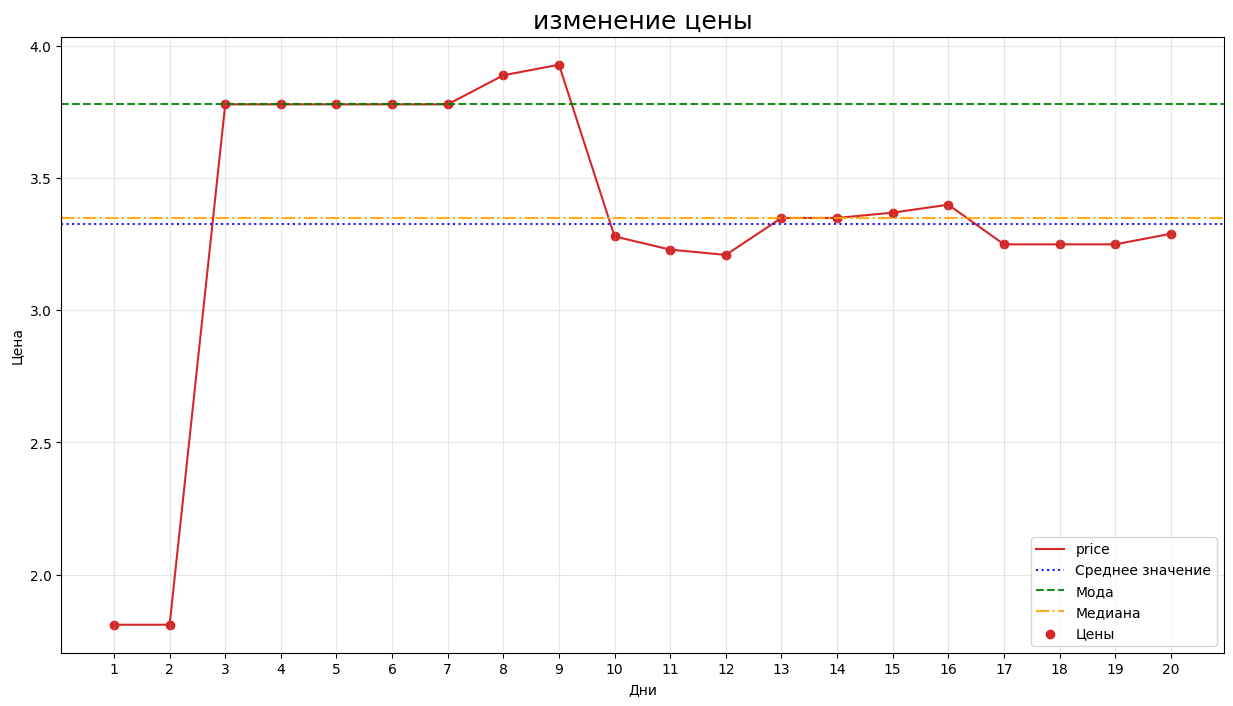

In [67]:
# Рисуем график
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('day', 'price', data=df, color='tab:red')

# Добавляем линии для среднего значения, моды и медианы
plt.axhline(y=mean_p, color='blue', linestyle=':', label='Среднее значение', alpha=.9)
plt.axhline(y=mode_p, color='green', linestyle='--', label='Мода', alpha=.9)
plt.axhline(y=median_p, color='orange', linestyle='-.', label='Медиана', alpha=.9)

# Добавляем точки для каждого значения цены
plt.scatter(df['day'], df['price'], color='tab:red', label='Цены')

# Добавляем легенду
plt.legend()

# Устанавливаем метки оси x для каждого дня
plt.xticks(df['day'])

# Добавляем подписи по бокам графика
plt.xlabel('Дни')
plt.ylabel('Цена')

# Обозначение
plt.title("изменение цены", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

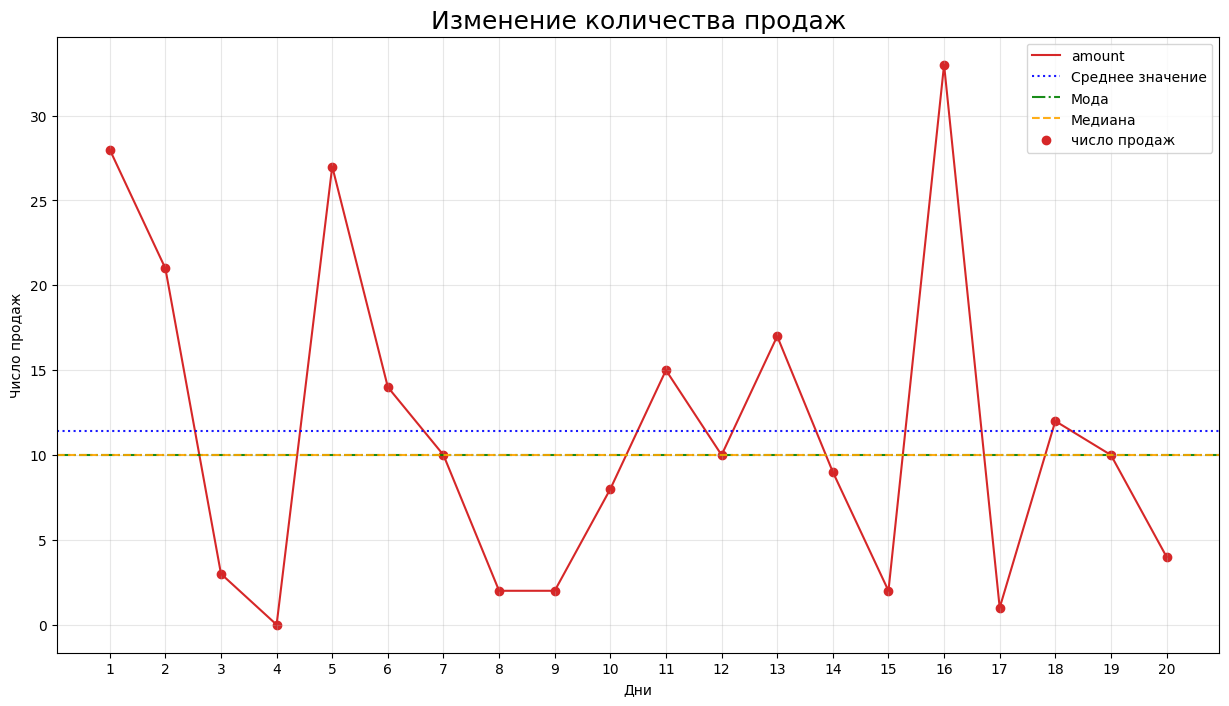

In [68]:
# Рисуем график
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('day', 'amount', data=df, color='tab:red')

# Добавляем линии для среднего значения, моды и медианы
plt.axhline(y=mean_a, color='blue', linestyle=':', label='Среднее значение', alpha=.9)
plt.axhline(y=mode_a, color='green', linestyle='-.', label='Мода', alpha=.9)
plt.axhline(y=median_a, color='orange', linestyle='--', label='Медиана', alpha=.9)

# Добавляем точки для каждого значения цены
plt.scatter(df['day'], df['amount'], color='tab:red', label='число продаж')

# Добавляем легенду
plt.legend()

# Устанавливаем метки оси x для каждого дня
plt.xticks(df['day'])

# Добавляем подписи по бокам графика
plt.xlabel('Дни')
plt.ylabel('Число продаж')

# Обозначение
plt.title("Изменение количества продаж", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

Теперь определим величины дисперсии и среднеквадратичного отклонения для цены и количества продаж

Для начала найдём дисперсию для цены и количества продаж
Дисперсия характеризует разброс случайной величины вокруг ее математического ожидания.
Дисперсия (D) - это среднее арифметическое квадратов отклонений случайных величин от их среднего арифметического.
В основном дисперсия нужна для нахождения среднеквадратичного отклонения

In [69]:
variance_p = sum((df["price"] - mean_p) ** 2) / (len(df["price"]))
variance_p

0.31809275

In [70]:
variance_a = sum((df["amount"] - mean_a) ** 2) / (len(df["amount"]))
variance_a

89.04

Теперь рассчитаем среднеквадратичного (стандартного) отклонения для цены и количества продаж
Среднее квадратическое - это степень надежности средней величины. Чем меньше среднее квадратическое, тем лучше соответствует средняя величина.
При нормальном распределении случайных величин доверительный интервал с границами +- СКО означает, что истинная величина находится в этих пределах с вероятностью Р = 0,682 - в этом заключается физический смысл СКО.

In [71]:
standard_deviation_p = variance_p ** 0.5
# standard_deviation_p = df["price"].std(ddof=0)
standard_deviation_p

0.5639971187869668

In [72]:
standard_deviation_a = variance_a ** 0.5
#standard_deviation_a = df["amount"].std(ddof=0)
standard_deviation_a

9.43610088966836

В среднем объём продаж отличается на 9 штук, а

Степени однородности

1.   Кривая лоренца
2.   Коэффициен джини
3.   Индекс Херффиндаля-Хиршмана

Для построения кривой лоренца Строиться расчётная таблица, где значение элементов входящих в эту таблицу вычисляется по формулам
u(j) = i/n
v(j) = Σ i from 1 to j x(i)/Σ i from 1 to n x(i)

Вычислим эту таблицу для изменения цен и изменения количества продаж
Но для начала отсортируем цены и количество продаж


In [73]:
prices = df["price"].sort_values()
amounts = df["amount"].sort_values()

In [74]:
lorenc_df_p = pd.DataFrame({'u': [i / len(df) for i in range(0, 21)],
                            'v': [(prices[0:j].sum() / prices.sum()) for j in range(0, 21)]})
lorenc_df_p

,u,v
0,0.00,0.000000
1,0.05,0.027189
2,0.10,0.054379
3,0.15,0.102599
4,0.20,0.151119
5,0.25,0.199940
6,0.30,0.248761
7,0.35,0.297581
8,0.40,0.346853
9,0.45,0.396275


In [75]:
lorenc_df_a = pd.DataFrame({'u': [i / len(df) for i in range(0, 21)],
                            'v': [(amounts[0:j].sum() / amounts.sum()) for j in range(0, 21)]})
lorenc_df_a

,u,v
0,0.00,0.000000
1,0.05,0.000000
2,0.10,0.004386
3,0.15,0.013158
4,0.20,0.021930
5,0.25,0.030702
6,0.30,0.043860
7,0.35,0.061404
8,0.40,0.096491
9,0.45,0.135965


И построим кривую лоренца для x и y. Чем ближе график к линии абсолютного равенства (пунктирная линия) тем более равномерное распределение, чем дальше, тем больше неравенство
Кривая лоренца часто используется в экономике для демонстрации равенства/неравенства распределения расходов

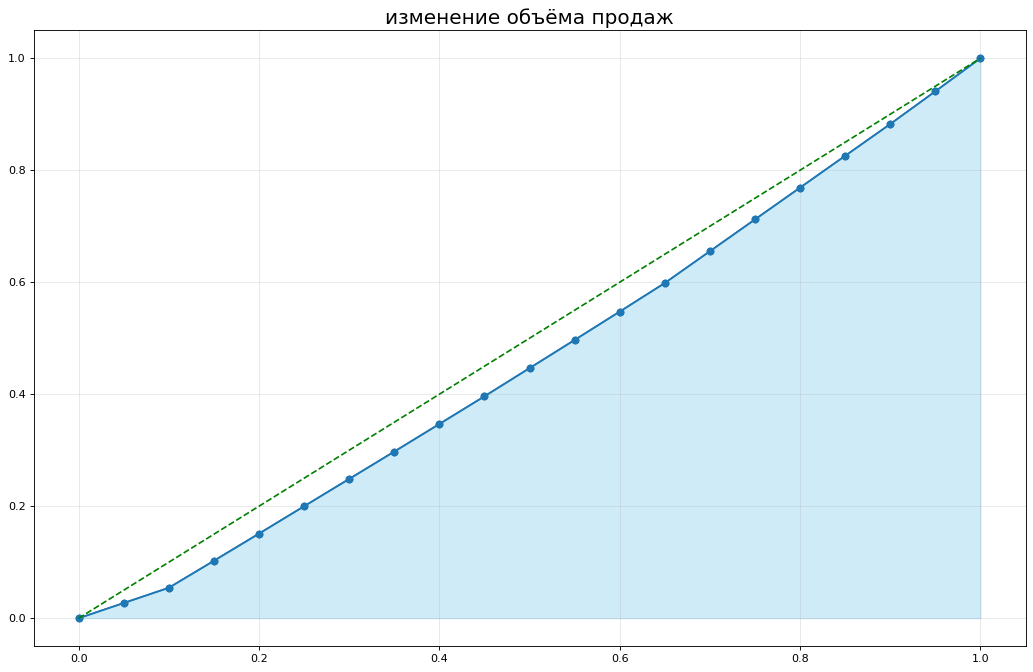

In [76]:
# Рисуем график
plt.figure(figsize=(16, 10), dpi=80)
plt.plot(lorenc_df_p['u'], lorenc_df_p['v'], color='tab:blue', marker='o')
plt.plot(lorenc_df_p['u'], lorenc_df_p['v'], color='tab:blue', marker='o')

# Добавляем линию y=x (линейная функция)
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='y=x')

plt.fill_between(lorenc_df_p['u'], lorenc_df_p['v'], color='skyblue', alpha=0.4)

# Описание
plt.title("изменение объёма продаж", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

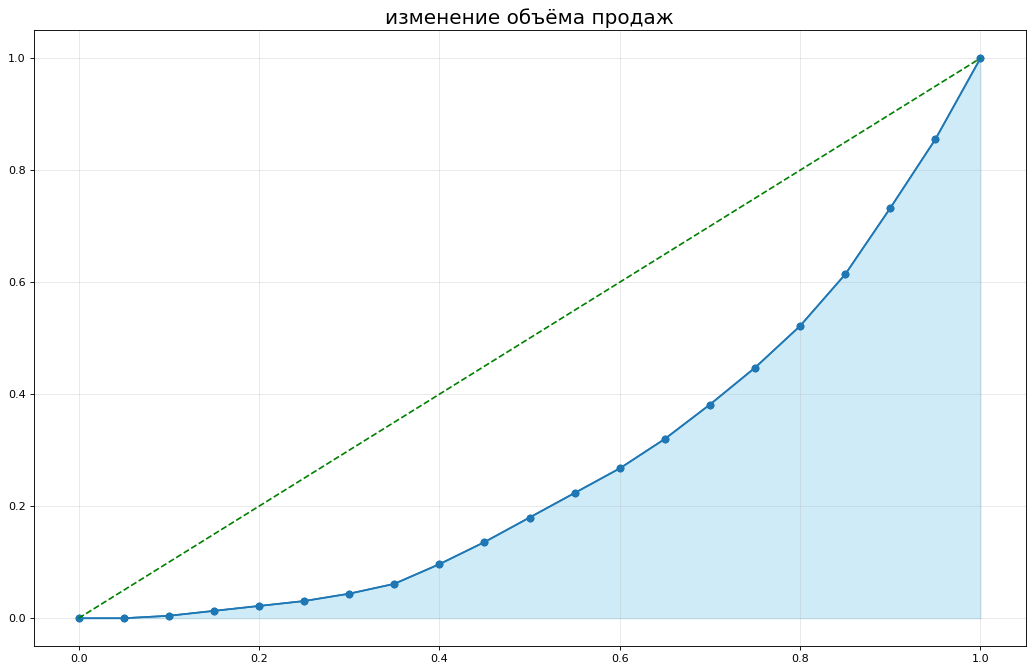

In [77]:
# Рисуем график
plt.figure(figsize=(16, 10), dpi=80)
plt.plot(lorenc_df_a['u'], lorenc_df_a['v'], color='tab:blue', marker='o')
plt.plot(lorenc_df_a['u'], lorenc_df_a['v'], color='tab:blue', marker='o')

# Добавляем линию y=x (линейная функция)
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='y=x')

plt.fill_between(lorenc_df_a['u'], lorenc_df_a['v'], color='skyblue', alpha=0.4)

# Описание
plt.title("изменение объёма продаж", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

Можно сделать вывод, что распределяется цены практически равномерно, а распределение количества продаж достаточно неравномерно
Более точно оценить неравномерность можно с помощью коэффициентов джинни

Коэффициент Джинни - количественно отражает степень неравенства. Чем больше неравенство, тем больше коэффициент Джинни. Измеряется от 0 до 1
коэффициент равен площади фигуры, образованной линией абсолютного равенства и кривой Лоренца


In [78]:
n = len(prices)
g_p = (2 / n) * (np.arange(1, n + 1) * prices).sum() / prices.sum() - ((n + 1) / n)
g_p

0.07998347604025824

In [79]:
n = len(amounts)
g_a = (2 / n) * (np.arange(1, n + 1) * amounts).sum() / amounts.sum() - ((n + 1) / n)
g_a


0.4548245614035089

Из коэффициентов Джинни видно, что количество продаж распределено значительно более неравномерно, чем цены

Индекса Херфиндаля-Хиршмана, который в экономике отвечает за концентрацию рынка.

In [80]:
_, cnt = np.unique(prices, return_counts=True)
h_p = np.square(cnt/cnt.sum()).sum()

h_p

0.125

In [81]:
_, cnt = np.unique(amounts, return_counts=True)
h_p = np.square(cnt/cnt.sum()).sum()

h_p

0.08000000000000002

Из расчётов видно, Что цены более сконцентрированы, чем количество продаж